In [1]:
  # Course : BA222
  # Title  : Homework #2
  # Author : Nicole Lubaczewska
  # Date   : 9/16
  # Description: My solutions to Homework #2

In [1]:
#Problem 1

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sb
import pandas as pd

In [27]:
#1.1 - Suppose that an analyst, using data from different Dunkin' Donuts locations in Boston, 
#is estimating the relation between Sales (y, measured in weekly USD) and distance to the nearest
#subway station (x, measured in meters) with a regression model.

#a. Which one of the two variables should be the dependent variable in the regression model? Explain.

#sales should be the dependent variable since we can change the distance to the subway station and check
#how the sales are affected by that change, it's our y variable, it is the variable that we are
#trying to explain with the model.

#b. Use a linear equation to represent the regression model.(Hint: don't forget the error term!)

#Sales = β0 + β1* distance + error

#c. What other factors, besides the distance to the nearest subway station, may affect the variable Sales?
#How are these factors represented in the model? Taking them into consideration, interpret the intercept
#and slope coefficients (the betas). 

#Other factors which affect Sales are for example: weather (if it's raining or if it's a sunny day), 
#time of the day (more people usually drink coffee in the morning). There factors are represented by the ERROR 
#in the model.

# Intercept is β0, it represents the average value of y when x 
#(the distance) is equal to zero. 

#Slope is B1, represent by how much the avarage value of sales 
#changes when x (distance) increases by 1 unit (1 meter)

#The error term represents all other factors that are associated with y that are different from x.

#d. Assume that the estimated model is equal to: y = 15,342 − 50x
#Predict the sales for a location that is ON a subway station? What about a location that is 100 meters away?

#Sales for Location on the subway: 15,342 #dollars
#Sales for 100m away from subway: 15,342 - 50*100 = 10342 #dollars

#e. For some values of x the prediction of the model that sales are negative, which is non-sensical. 
#Explain graphically why is that possible when using a linear regression model.

#15342/50, if the distance is above 306.84 meters the sales will be equal to 0 - 
#this is because any line with an equation of mx+ b will end up crossing there x axis

#draw regression

Workers earnings when 65 inches tall are 45485.81999999999
Workers earnings when 67 inches tall are 46901.159999999996
Workers earnings when 70 inches tall are 49024.16999999999


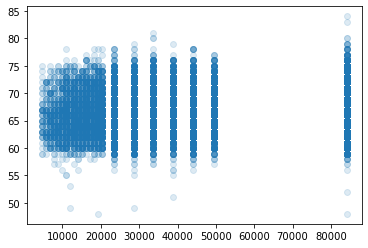

In [2]:
# Problem 1.2
# Use the Earnings_and_Height.csv data to answer the questions of the following problem.

path = '/Users/nicolelubaczewska/Downloads/earningsAndHeight.csv'

eh = pd.read_csv(path)

#a. What is the median value of height in the sample?

eh.height.median() # = 67

#b. Estimate the average earnings for workers whose height is at most 67 inches.

eh.earnings[eh.height <= 67].mean() # = 44,488.44

#c. Estimate the average earnings for workers whose height is greater than 67 inches.

eh.earnings[eh.height > 67].mean() # = 49,987.88

#d. Construct a scatterplot of annual earnings (Earnings) on height (Height). 
#Notice that the points on the plot fall along horizontal lines.(There are only 23 distinct values of Earnings)
#Why? Is there an alternative way of displaying the relation between the two variables that is more 
#appropriate to determine if the two variables are related? If yes, produce the appropriate type of graph. 
#(Hint: Carefully read the detailed data description.)


plt.scatter(eh['earnings'], eh['height'], alpha = 0.15)

#in the data decriptions says: annual labor earnings, expressed in 2012
#In the survey, labor earnings are reported in 23 brackets (for example, $26,000-$30,00). 
#For each ofthese brackets Professors Case and Paxson estimated a value of average earnings 
#based on information inthe Current Population, and these average values were assigned to all 
#workers with incomes in thecorresponding bracket. The earnings values for 1994 were converted 
#to $2012 using the consumer priceindex.

# Better type of graph - bar chart

#plt.barh(eh['earnings'], eh['height'])
#plt.show() #why not working?

#e. Run a regression of Earnings on Height . What is the estimated slope? Use the estimated regression to 
#predict the earnings for a worker who is 65 inches tall, for a worker who is 67 inches tall and for a 
#worker that is 70 inches tall.

model = smf.ols('earnings ~ height', data = eh)
estimation = model.fit()
estimation.params

#intercept: -512.73
#slope: 707.67
    
# earnings = 707.67*height - 512.73 + error

print('Worker''s earnings when 65 inches tall are', 707.67*65 - 512.73)
print('Worker''s earnings when 67 inches tall are',707.67*67 - 512.73)
print('Worker''s earnings when 70 inches tall are',707.67*70 - 512.73)

#f. What problems you may encounter if you try to use the model to predict the earnings of extremely 
#tall/short individuals? Explain.

#It may be outside of the range of the regression and such outliers 
#would then not be applicable to this regression model




In [5]:
eh

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,3,1,84054.75000,65,133,1
1,0,41,6,12,1,2,1,14021.39453,65,155,1
2,0,26,1,16,1,1,1,84054.75000,60,108,1
3,0,37,1,16,1,2,1,84054.75000,67,150,1
4,0,35,6,16,1,1,1,28560.38672,68,180,1
...,...,...,...,...,...,...,...,...,...,...,...
17865,1,47,6,12,1,1,1,18168.84180,70,150,15
17866,1,44,1,12,2,4,1,84054.75000,74,230,15
17867,1,30,1,12,1,3,1,16081.58789,65,162,15
17868,1,46,3,12,4,4,1,84054.75000,68,190,15


In [3]:
#g. Estimate the model only using data for females, and then using data only for males. 
#Do you observe any difference in the estimated coefficients? Why that may be the case? 

#female
model = smf.ols('earnings ~ height', data = eh[eh.sex == 0])
estimation = model.fit()
estimation.params

#intercept = 12650.86
#slope = 511.22

#male
model = smf.ols('earnings ~ height', data = eh[eh.sex == 1])
estimation = model.fit()
estimation.params

#intercept = -43130.34
#slope = 1306.86

#there are differences in the estimated coefficients, which suggests that gender 
#affects earnings and height as well
#e.g. if a female's height increases by 1 their earnings increase on avg by 1306 whereas for man it is on 
#avg 511 dollars

#h. Do you think that there are other factors besides Height that may be omitted in the model? Explain.

#yes, even sex shows that they might be affecting the model. 
#I also think that education and region could affect one's earnings.


Intercept   -43130.342344
height        1306.859906
dtype: float64

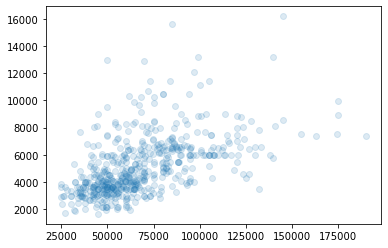

0.28707700259705604

In [4]:
#Problem 1.3
#Use the HousePrices.csv database to answer the following questions:

path = '/Users/nicolelubaczewska/Downloads/HousePrices.csv'

hp = pd.read_csv(path)

hp

#a. Represent graphically the relation between price and lot size. 
#Describe the statistical relation between the variables. If necessary, compute the correlation coefficient.

plt.scatter(hp['price'], hp['lotsize'], alpha = 0.15)
plt.show()
hp[['price','lotsize']].corr() #not so strong positive correlation between price and lotsize 
#0.536 correlation coefficient (moderate)

#b. Estimate a univariate regression model using price as the dependent variable and lot size as the 
#independent variable. Display the results in a table.

model = smf.ols('price ~ lotsize', data = hp)
estimation = model.fit()
estimation.params
estimation.rsquared #0.29

#c. Interpret the intercept, slope, R-Squared and statistical significance of the beta coefficients.

#intercept (b0) = 34136.19, represents the average value of lotsize when price is equal to zero.
#Not significant to us because it's impossible to get such a lotsize for free. 

#slope (b1) = 6.60, represents by how much the average value of lotsize changes when price increases by one unit
#significant, lotsize increase as price increase

#rsquared = 0.29,  R-Squared is a value between 0 and 1 that indicates the percentage of the 
#variation of the variable y (price) can be explained with the regression model. Higher rsqaured are better because
#most of the variation in the y variable (price in this case) is accounted by the regression model. Our rsquared of 0.29 
#shows a lot of variation that isn't accounted by the regression model.


For general regression Intercept    34136.191565
lotsize          6.598768
dtype: float64


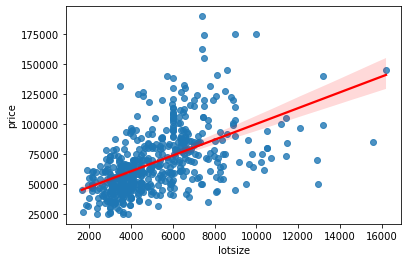

For housing with 1,2 bedrooms Intercept    32520.827789
lotsize          4.147871
dtype: float64


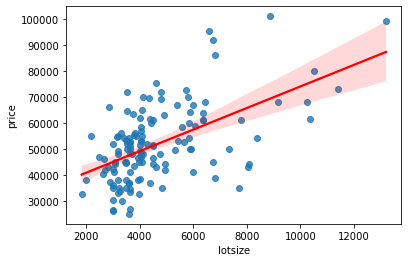

For housing with 3 or more bedrooms Intercept    38548.309693
lotsize          6.592476
dtype: float64


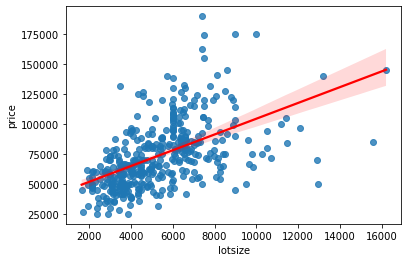

In [5]:
#g. Now estimate the same model twice: first, using only houses with 1 or 2 bedrooms and, then, 
#using houses with three or more bedrooms. Display the three regression lines. What do you think explains 
#the gap between the three lines?

model0 = smf.ols('price ~ lotsize', data = hp)
estimation0 = model0.fit()
print('For general regression', estimation0.params)

sb.regplot(x = hp.lotsize, y = hp.price, line_kws = {'color': 'red'})
plt.show()

model1 = smf.ols('price ~ lotsize', data = hp[hp.bedrooms <= 2])
estimation1 = model1.fit()
print('For housing with 1,2 bedrooms', estimation1.params)
#print(sb.regplot(x = hp.lotsize, y = hp.price, line_kws = {'color': 'red'}))

sb.regplot(x = hp.lotsize[hp.bedrooms <= 2], y = hp.price[hp.bedrooms <= 2], line_kws = {'color': 'red'})
plt.show()

model2 = smf.ols('price ~ lotsize', data = hp[hp.bedrooms >= 3])
estimation2 = model2.fit()
print('For housing with 3 or more bedrooms',estimation2.params)

sb.regplot(x = hp.lotsize[hp.bedrooms >= 3], y = hp.price[hp.bedrooms >= 3], line_kws = {'color': 'red'})
plt.show()

#What do you think explains the gap between the three lines?

#I think the gap between the three lines can be explained due to the region in which these apartments
#might be located. There also seems to be more housing for 3 or more bedrooms in the data which could
#suggest why the 1,2 bedroom apartments are so much more disperse. It also is affected by the fact that in general 1,2 bedroom apartments
#don't vary in size tis much but 3,4 bedroom apartments can be enourmous

#Different ranges - what do the intercept and slope mean graphically? 

In [122]:
hp

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [123]:
# PART 2: Multivariate Regressions

# a. Estimate the following multivariate regression models.

reg1 = smf.ols('price ~ lotsize + garage + aircon + bathrooms', data = hp).fit()

reg2 = smf.ols('price ~ lotsize + bedrooms + bathrooms + garage', data = hp).fit()

reg3 = smf.ols('lotsize ~ price + bedrooms + bathrooms + garage', data = hp).fit()

reg4 = smf.ols('lotsize ~ price + garage + aircon + bathrooms', data = hp).fit()


#b.Out of the four models estimated in part (a). 
#Which one is the best model we can use for predicting the price of a house?

print(reg1.rsquared_adj) #highest rsqaured of 0.56, best model for predicting the price of the house (also price here is dependable - necessary)
print(reg2.rsquared_adj)
print(reg3.rsquared_adj)
print(reg4.rsquared_adj)

#first model is the best for predicitng the price of the house due to highest adjusted rsquared

0.5608135481340832
0.5053422851022935
0.3169294692390614
0.3169154155529793


In [15]:
#c. Estimate the beta coefficients of each regression model from part 
#(a) and determine if they are statistically different than zero or not. 

print ('multivariate regression model 1 is', reg1.summary()) #yes for all

print ('multivariate regression model 2 is', reg2.summary()) #not for intercept

print ('multivariate regression model 3 is', reg3.summary()) #not for bedrooms

print ('multivariate regression model 4 is', reg4.summary()) #not for aircon


multivariate regression model 1 is                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     175.0
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           4.54e-96
Time:                        20:51:13   Log-Likelihood:                -6112.7
No. Observations:                 546   AIC:                         1.224e+04
Df Residuals:                     541   BIC:                         1.226e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept  

In [37]:
#d. Estimate the price of the following houses (table in HW 2)

#i think i need one model or look at the data for the most common data for this?
#maybe a regression model? I need to look at LN12

reg5 = smf.ols('price ~ lotsize + garage + aircon + bathrooms + bedrooms + driveway + prefer + recreation + fullbase', data = hp).fit()

print(reg5.params)

print('House number 1 estimated costs equals', 3.35*6360 +  4071.95 + 14420.93 + 2 * 16922.83 + 3* 4597.05 +  8800.53)
print('House number 2 estimated costs equals', 3.35*4600 + 14420.93 + 3* 16922.83 + 2 * 4597.05 +  8800.53 +  5336.90)
print('House number 3 estimated costs equals', 3.35*3600 + 4071.95 + 14420.93 + 2* 16922.83 + 3 * 4597.05 + 9363.31 + 5336.90)
print('House number 4 estimated costs equals', 3.35*7500 + 2* 16922.83 + 4 * 4597.05 +  8800.53 + 2378.28)

Intercept            -3436.988651
aircon[T.yes]        14420.934907
driveway[T.yes]       8800.531240
prefer[T.yes]         9363.314152
recreation[T.yes]     5336.897986
fullbase[T.yes]       2378.279639
lotsize                  3.348679
garage                4071.953667
bathrooms            16922.828459
bedrooms              4597.048580
dtype: float64
House number 1 estimated costs equals 96236.22
House number 2 estimated costs equals 103930.95000000001
House number 3 estimated costs equals 92889.9
House number 4 estimated costs equals 88537.67


Text(0, 0.5, 'Number of observations with this residual')

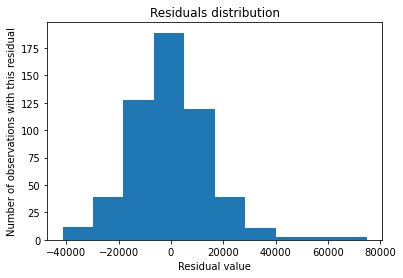

In [38]:
#e. Estimate the price of all the houses in the database. 
#Make a histogram of the residuals and describe its distribution.

reg6 = smf.ols('price ~ lotsize + garage + aircon + bathrooms + bedrooms + driveway + prefer + recreation + fullbase + stories + gasheat', data = hp).fit()

reg6.fittedvalues
residuals = reg6.resid

plt.hist(residuals)
plt.title('Residuals distribution')
plt.xlabel('Residual value')
plt.ylabel('Number of observations with this residual')


#The distribution seems to follow a normal distribution most closely with highest number of values
#around 0 - which means that the fitted observations were very close to the actual observations. 
#However, there is a slightly higher proportion of higher values which mean high residual. The predictive value
#in this case was too low in comparison to the fitted value. 


In [12]:
#PART 3. OMITTED VARIABLE BIAS
#a. Do you think the models estimated in Part 1 
#suffers from omitted variable bias? Explain.

#Yes, I believe so. #I think that there are variables z (e.g competition, size of subway, eh.gender, and location)
#that are simultaneously related to variable y and x. 
#When we add that variable z it changes the model and corrects the bias. 
#This is what we saw e.g. as the predictive power of the model increased.



In [32]:
#b.Make a diagram to represent how the bias is affecting the 
#estimated coefficients in Problems 1.1, 1.2 and 1.3.

#1.1

#Y = sales
#X = location from subway
#Z = competition

#1.2
# Y = earnings
# X = height
# Z = gender

#1.3
#Y = price
#X = lotsize
#Z = bedrooms

#Conditons:
#    1. Z is not in the model
#    2. Z -> X
#    3. Z -> Y

#OVB Summary:
#    1. Conditions
#    2. Indentification (corr matrix)
#    3. Fix

eh.corr()
hp.corr()


,price,lotsize,bedrooms,bathrooms,stories,garage
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrooms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garage,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


In [18]:
#c. Say you want to build houses with the intention of selling them.
#You need to decide how many bathrooms your houses should have.
#The marginal cost of each building an additional bathroom is 
#given by the following progression: (1) $5,000, (2) $10,000, 
#(3) $17,000 and (4) $30,0000. That is, if you plan to build a 
#house with a single bathroom; that will add $5,000 to the total 
#construction cost; but, if you build two bathrooms the total cost
#in bathrooms would be $15,000 (5000 + 10000), and so on. 
#Estimate a regression model for which the coefficient for the 
#bathroom coefficient is the least biases as possible given the 
#available data. Use that model to decide how many bathrooms to build.

hp.columns

reg6 = smf.ols('price ~ bathrooms', data = hp).fit()
print(reg6.params)

# Lotsize
# Bedrooms
# Stories
# Garage
#Driveway
#Recreation
#Fullbase
#Aircon
#Prefer
#Gasheat

hp['drivewayDummy'] = hp.driveway == 'yes'
hp['recreationDummy'] = hp.recreation == 'yes'
hp['fullbaseDummy'] = hp.fullbase == 'yes'
hp['airconDummy'] = hp.aircon == 'yes'
hp['preferDummy'] = hp.prefer == 'yes'
hp['gasheatDummy'] = hp.gasheat == 'yes'

hp.corr()[['price', 'bathrooms']]


reg7 = smf.ols('price ~ bathrooms + lotsize + bedrooms + stories + garage + driveway + recreation + fullbase + aircon + prefer + gasheat', data = hp).fit()
print(reg7.params)

print('Cost of 3 bathrooms', 5000+10000+17000)
print ('Affect on price of 3 bathrooms',3*14335.56)
print('Cost of 4 bathrooms', 5000+10000+17000+30000)
print('Affect on price of 4 bathrooms', 4*14335.56)

#Answer: Build 3 bathrooms because the effect of price is bigger than the cost of them

Intercept    32794.044352
bathrooms    27476.985447
dtype: float64
Intercept            -4038.350425
driveway[T.yes]       6687.778890
recreation[T.yes]     4511.283826
fullbase[T.yes]       5452.385539
aircon[T.yes]        12632.890405
prefer[T.yes]         9369.513239
gasheat[T.yes]       12831.406266
bathrooms            14335.558468
lotsize                  3.546303
bedrooms              1832.003466
stories               6556.945711
garage                4244.829004
dtype: float64
Cost of 3 bathrooms 32000
Affect on price of 3 bathrooms 43006.68
Cost of 4 bathrooms 62000
Affect on price of 4 bathrooms 57342.24


In [131]:
#d. Discuss the pros and cons of using linear regression models 
#to answer policy questions like the one discussed in part (c).

#PROS

#CONS
#We are assuming linearity and this could be misleading.

In [7]:
hp

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no
